# Задание 1.1


1. Написать класс BoomBam, у которого есть метод Boom. При его вызове, как ни странно, печатается слово BOOM
2. Доработать этот класс так, чтобы вызов метода чередовал слова BOOM и BAM.

Плюс пример использования всего функционала класса с комментариями


In [642]:
class BoomBam:
    def __init__(self):
        self.tmblr = True

    def Boom(self):
        print('BOOM')

    def Bam(self):
        print('BAM')

    def click(self):
        self.tmblr = abs(self.tmblr - 1)

    def message(self):
        if self.tmblr == True:
            self.Boom()
        else:
            self.Bam()
        self.click()


In [643]:
# создаем экземпляр
a = BoomBam()

In [644]:
# изначально добавляется атрибут .tmblr = True
a.tmblr

True

In [48]:
# метод Boom
a.Boom()

BOOM


In [ ]:
# метод Bam
a.Bam()

In [646]:
# добавлен метод click который меняет значение атрибута .tmblr с True на False и наоборот
print(a.tmblr)
a.click()
print(a.tmblr)
a.click()
print(a.tmblr)

1
0
1


In [647]:
# следующий метод mesage()? который в зависимости от значения tmblr запускает метод Boom или Bam

In [648]:
for _ in range(10):
    a.message()


BOOM
BAM
BOOM
BAM
BOOM
BAM
BOOM
BAM
BOOM
BAM


# Задание 1.2


Создайте класс RoundCircle. Методы:
* add(x, y) -- добавление точки с координатами (x, y)
* remove(x, y) -- удаление точки с координатами (x, y)
* circle() -- печать координат центра и радиуса минимальной окружности, содержащей все эти точки
* plot() -- создание изображения (графика), на котором нарисованы все точки и окружность

Плюс пример использования всего функционала класса с комментариями

In [604]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from itertools import combinations

In [619]:
class RoundCircle:
    def __init__(self):
        self.dots = []
        self.all_circles = []

    def add(self, x, y):
        if (x,y) not in self.dots:
            self.dots.append((x,y))

    def random_dots(self, n = 10, range_x = (-10, 10), range_y = (-10, 10)):
        for _ in range(n):
            self.add(
                randint(range_x[0], range_x[1]),
                randint(range_y[0], range_y[1])
            )

    def remove(self, x, y):
        try:
            self.dots.remove((x,y))
        except ValueError:
            pass

    def run(self):
        try:
            type(self.true_circles)
        except AttributeError:
            self.get_lines()
            self.get_triangles()
            self.dots_in_circle()

# получаем все возможные отрезки между точками (dot1, dot2): = длинна отрезка
# плюс данные о окружностях с центром на этих отрезках [x-окружности],[у-окружности],[радиус окружности]
    def get_lines(self):
        self.all_lines = dict()
        for indx1, dot1 in enumerate(self.dots):
            for indx2, dot2 in enumerate(self.dots[indx1 + 1:]):
                xo = (dot1[0] + dot2[0])/2
                yo = (dot1[1] + dot2[1])/2
                d = np.sqrt(((dot2[0]-dot1[0])**2) + ((dot2[1]-dot1[1])**2))/2
                self.all_lines[(indx1, indx2+indx1+1)] = d
                self.all_circles.append((xo,yo,d))

# получаем все возможные треугольники и окружности их описывающие [x-окружности],[у-окружности],[радиус окружности]
    def get_triangles(self):
        self.all_triangles = [i for i in combinations(range(0, len(self.dots)), 3)]
        for i in self.all_triangles:
            a, b, c = combinations(i, 2)
            a, b, c = self.all_lines[a], self.all_lines[b], self.all_lines[c]
            ax,ay,bx,by,cx,cy = self.dots[i[0]][0],self.dots[i[0]][1],\
                                self.dots[i[1]][0],self.dots[i[1]][1],\
                                self.dots[i[2]][0],self.dots[i[2]][1]
            p = (a+b+c)/2
            if ((ax-cx)*(by-cy)-(bx-cx)*(ay-cy))*0.5 == 0:
                continue
            r = ((a*b*c)/(4*np.sqrt(abs(p*(p-a)*(p-b)*(p-c)))))*2
            xo = ((ay*(bx**2+by**2-cx**2-cy**2)+by*(cx**2 +cy**2-ax**2-ay**2)+cy*(ax**2+ay**2-bx**2-by**2))/
                  (ax*(by-cy)+bx*(cy-ay)+cx*(ay-by)))*(-0.5)
            yo = ((ax*(bx**2+by**2-cx**2-cy**2)+bx*(cx**2 +cy**2-ax**2-ay**2)+cx*(ax**2+ay**2-bx**2-by**2))/
                  (ax*(by-cy)+bx*(cy-ay)+cx*(ay-by)))*0.5
            self.all_circles.append((xo,yo, r))

    def dots_in_circle(self):
        self.true_circles = []
        for circle in self.all_circles:
            for dot in self.dots:
                if round((dot[0] - circle[0])**2 + (dot[1] - circle[1])**2,9) > round(circle[2]**2, 9):
                    break
            else:
                self.true_circles.append((circle[0], circle[1], circle[2]))

    def circle(self):
        self.run()
        tmp = [i[2] for i in self.true_circles]
        self.circle = self.true_circles[tmp.index(min(tmp))]
        print(f'Координаты центра окружности: ({self.circle[0]}, {self.circle[1]}), радиус: {self.circle[2]}')

    def plot(self):
        x,y,r = self.circle
        circle = plt.Circle((x, y), r, color = 'silver')
        fig = plt.figure(figsize=(10,10))
        ax = plt.gca()
        ax.cla()
        ax.spines['left'].set_position(('data',0))
        ax.spines['bottom'].set_position(('data',0))
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.set_xlim((x-r*1.1, x+r*1.1))
        ax.set_ylim((y-r*1.1, y+r*1.1))
        ax.plot([i[0] for i in self.dots],([j[1] for j in self.dots]), 'o', color='black')
        ax.plot(x, y, 'o', color='red')
        plt.annotate(f'({round(x, 2)}, {round(y, 2)})', (x, y), xytext=(x + r*0.03, y - r* 0.04), c = 'red')
        ax.add_artist(circle)
        plt.show()


In [620]:
# создаем экземпляр класса
a = RoundCircle()

In [621]:
# добавим пару точек
a.add(3,7)
a.add(-1,4)

In [622]:
# посмотрим сущеструющие точки
print(a.dots)

[(3, 7), (-1, 4)]


In [623]:
# невозможно добавить одинаковые точки
a.add(3,7)
a.add(9,3)
print(a.dots)

[(3, 7), (-1, 4), (9, 3)]


In [624]:
# удалим одну точку
a.remove(3,7)
print(a.dots)

[(-1, 4), (9, 3)]


In [625]:
# добавим случайных точек
a.random_dots( n = 20, range_x = (-20, 20), range_y = (-20, 20))

In [626]:
print(a.dots)

[(-1, 4), (9, 3), (-10, 5), (19, 18), (-5, -4), (-18, 9), (0, -14), (1, -20), (-16, -1), (-1, 15), (5, -14), (6, 17), (16, -12), (18, 0), (2, 1), (11, 9), (-20, 6), (-6, 1), (-3, 15), (-12, 10), (0, -11), (3, 20)]


In [627]:
# получаем данные о минимальной окружности описывающей все точки
a.circle()

Координаты центра окружности: (2.390995260663507, 2.604265402843602), радиус: 22.64702369445885


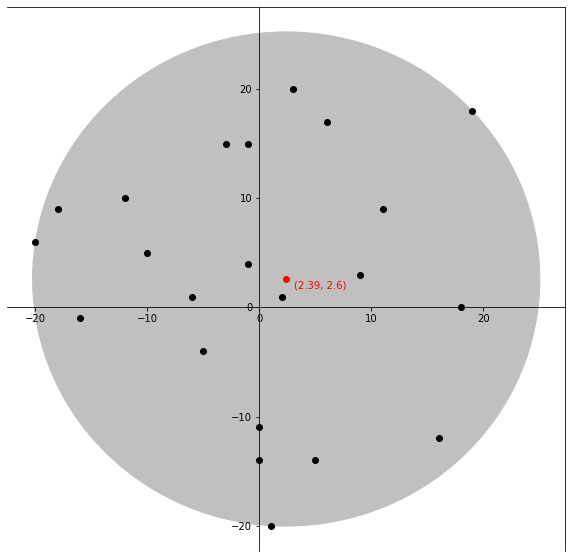

In [628]:
# рисуем круг и точки
a.plot()

-----------------------------------------------------

In [ ]:
# метод .circle() проверяет имеется ли экземпляра объекта атрибут .true_circles
# если нет, он запускает ряд методов для нахождения нужной окружности
# далее эти методы по порядку

In [629]:
# создаем экземпляр объекта
b = RoundCircle()
b.random_dots( n = 5, range_x = (2, 11), range_y = (0, 3))

In [630]:
# запускаем метод get_lines() который находит все отрезки между точками
b.get_lines()

In [631]:
# этот метод создает два атрибута

{(0, 1): 1.0,
 (0, 2): 0.5,
 (0, 3): 1.118033988749895,
 (0, 4): 4.0,
 (1, 2): 1.118033988749895,
 (1, 3): 1.8027756377319946,
 (1, 4): 4.123105625617661,
 (2, 3): 1.5811388300841898,
 (2, 4): 4.5,
 (3, 4): 3.0413812651491097}

In [ ]:
# словарь all_lines в котором содержаться длинны отрезков
# (dot1, dot2): = длинна отрезка
b.all_lines

In [633]:
# список all_circle в котором содержатся все возможные окружности
# [x-окружности],[у-окружности],[радиус окружности]
# после исполнения метода get_lines в этот атрибут добавляются все окружности построенные по двум точкам
b.all_circles

[(10.0, 2.0, 1.0),
 (10.5, 1.0, 0.5),
 (9.0, 0.5, 1.118033988749895),
 (6.0, 1.0, 4.0),
 (10.5, 2.0, 1.118033988749895),
 (9.0, 1.5, 1.8027756377319946),
 (6.0, 2.0, 4.123105625617661),
 (9.5, 0.5, 1.5811388300841898),
 (6.5, 1.0, 4.5),
 (5.0, 0.5, 3.0413812651491097)]

In [634]:
# далее метод get_triangles(), получаем все возможные комбинации по три точки
# после чего находятся окружности описывающие эти треугольники
# (три точки лежащие на одной прямой отсеиваются)
b.get_triangles()

In [636]:
# после того как метод отработал у экземпляра появляется атрибут all_triangles
# все возможные треугольники из заданых точек
b.all_triangles

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4)]

In [637]:
# а так же в атрибут all_circles добавляются новые окружности
b.all_circles

[(10.0, 2.0, 1.0),
 (10.5, 1.0, 0.5),
 (9.0, 0.5, 1.118033988749895),
 (6.0, 1.0, 4.0),
 (10.5, 2.0, 1.118033988749895),
 (9.0, 1.5, 1.8027756377319946),
 (6.0, 2.0, 4.123105625617661),
 (9.5, 0.5, 1.5811388300841898),
 (6.5, 1.0, 4.5),
 (5.0, 0.5, 3.0413812651491097),
 (10.5, 2.0, 1.118033988749895),
 (8.25, 2.0, 2.015564437074636),
 (6.0, 2.0, 4.123105625617657),
 (10.5, -2.5, 3.535533905932729),
 (6.0, 6.5, 6.800735254367735),
 (9.214285714285714, 1.3571428571428572, 1.8210783977117078),
 (6.5, -0.0, 4.609772228646448),
 (5.55, 3.8, 4.521338297451321),
 (6.5, 9.5, 9.617692030835647)]

In [638]:
# следующий шаг метод dots_in_circle, который проверяет каждую окружность,
# на принодлежность к ней всех заданных точек
# результат заносится в список атрибута true_circles
b.dots_in_circle()
b.true_circles

[(6.5, 1.0, 4.5),
 (6.5, -0.0, 4.609772228646448),
 (6.5, 9.5, 9.617692030835647)]

Координаты центра окружности: (6.5, 1.0), радиус: 4.5


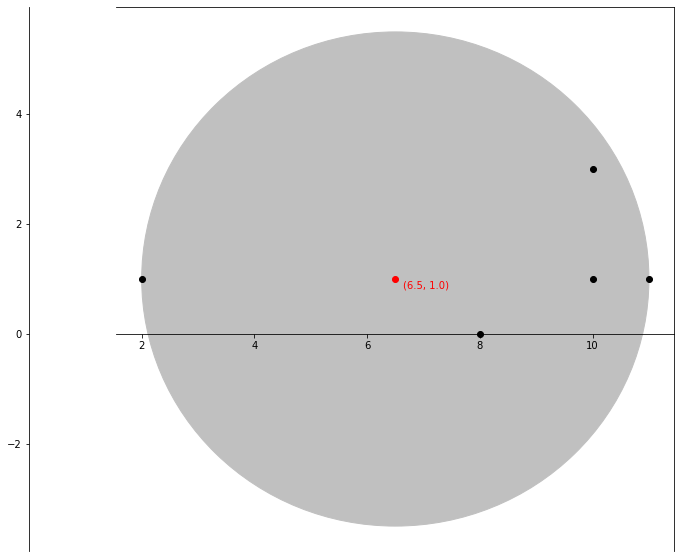

In [640]:
# следующий метод circle()
# среди окружностей из true_circles выбирается та у которой меньше радиус и выводится ее данные
b.circle()

In [ ]:
# рисуем на экране всю картину целиком
b.plot()

# Задание 2.1

Создать базовый класс - Геометрическая фигура, определить в нём поля и следующие методы: инициализация, печать, посчитать площадь и периметр. Создать 3 класса - наследника (квадрат, круг, конус), переопределить методы, при необходимости - добавить. 

Плюс пример использования всего функционала класса с комментариями


In [403]:
import numpy as np

In [446]:
class Figure:
    def __init__(self):
        self.fig = 'Не задана'
        self.s = 0
        self.p = 0
        self.v = 0

    def form(self, txt, obj):
        return f'| {txt}: {obj}'.ljust(79) + "|"

    def prnt(self):
        print(''.center(80,'-'))
        self.info()
        print(''.center(80,'-'))
        if self.s != 0:
            print(self.form('Площадь', self.s))
        if self.p != 0:
            print(self.form('Периметр', self.p))
        if self.v != 0:
            print(self.form('Объем', self.v))
        print(''.center(80,'-'))

    def info(self):
        print(self.form('Фигура', self.fig))
        print(''.center(80,'-'))

    def square(self):
        print(f'Площадь: {self.s}')

    def perimeter(self):
        pass

    def volume(self):
        pass


class Foursquare(Figure):
    def __init__(self, a):
        super().__init__()
        self.fig = 'Квадрат'
        self.a = a

    def info(self):
        super().info()
        print(self.form('Длинна сторон', self.a))

    def square(self, print = False):
        self.s = self.a**2
        if print == True:
            super().square()

    def perimeter(self, print = False):
        self.p = self.a*4
        if print == True:
            super().perimeter()


class Circle(Figure):
    def __init__(self, r):
        super().__init__()
        self.fig = 'Круг'
        self.r = r

    def info(self):
        super().info()
        print(self.form('Радиус', self.r))

    def square(self, print = False):
        self.s = self.r**2*np.pi
        if print == True:
            super().square()

    def perimeter(self, print = False):
        self.p = self.r*2*np.pi
        if print == True:
            super().perimeter()


class Cone(Figure):
    def __init__(self, r, h):
        super().__init__()
        self.fig = 'Конус'
        self.r = r
        self.h =h

    def info(self):
        super().info()
        print(self.form('Радиус основания', self.r))
        print(self.form('Высота', self.h))

    def square(self, print = False):
        tmp = Circle(self.r)
        tmp.square()
        self.s_circle = tmp.s
        self.s_surface = np.pi * self.r * np.sqrt(self.r**2 + self.h**2)

        self.s = self.s_circle + self.s_surface
        if print == True:
            super().square()

    def volume(self, print = False):
        if self.s_circle == 0:
            self.square()
        self.v = (self.h*self.s_circle)/3
        if print == True:
            super().volume()

    def perimeter(self, print = False):
            self.p = self.r*2*np.pi
            if print == True:
                super().perimeter()

In [421]:
# создаем квадрат с длинной стороны 3
f = Foursquare(3)

In [422]:
# периметр и площадь еще не вычислены
print(f.p, f.s)

0 0


In [423]:
f.perimeter()
f.square()

In [424]:
print(f.p, f.s)

12 9


In [425]:
# или полный вывод информации по объекту
f.prnt()

--------------------------------------------------------------------------------
| Фигура: Квадрат                                                              |
--------------------------------------------------------------------------------
| Длинна сторон: 3                                                             |
--------------------------------------------------------------------------------
| Площадь: 9                                                                   |
| Периметр: 12                                                                 |
--------------------------------------------------------------------------------


In [435]:
# тоже самое для круга
c = Circle(8)

In [437]:
c.perimeter()
c.square()
print(c.p, c.s)

50.26548245743669 201.06192982974676


In [438]:
# или полный вывод информации по объекту
c.prnt()

--------------------------------------------------------------------------------
| Фигура: Круг                                                                 |
--------------------------------------------------------------------------------
| Радиус: 8                                                                    |
--------------------------------------------------------------------------------
| Площадь: 201.06192982974676                                                  |
| Периметр: 50.26548245743669                                                  |
--------------------------------------------------------------------------------


In [447]:
# для конуса
con = Cone(r=7, h=3)

In [448]:
# периметр, площадь и объем равня 0
print(con.p, con.s, con.v)

0 0 0


In [449]:
# найдем площадь и объем
con.square()
con.volume()
print(con.s, con.v)

321.41763791142125 153.93804002589985


In [450]:
# объщая информация по фигуре
con.prnt()

--------------------------------------------------------------------------------
| Фигура: Конус                                                                |
--------------------------------------------------------------------------------
| Радиус основания: 7                                                          |
| Высота: 3                                                                    |
--------------------------------------------------------------------------------
| Площадь: 321.41763791142125                                                  |
| Объем: 153.93804002589985                                                    |
--------------------------------------------------------------------------------


In [451]:
# можно найти периметр основания окружности
con.perimeter()
print(con.p)

43.982297150257104


In [452]:
con.prnt()

--------------------------------------------------------------------------------
| Фигура: Конус                                                                |
--------------------------------------------------------------------------------
| Радиус основания: 7                                                          |
| Высота: 3                                                                    |
--------------------------------------------------------------------------------
| Площадь: 321.41763791142125                                                  |
| Периметр: 43.982297150257104                                                 |
| Объем: 153.93804002589985                                                    |
--------------------------------------------------------------------------------


# Задание 2.2

Создать собственный класс - строку. Отнаследовать от него классы: палиндром (при инициалицации создаёт из строки палиндром, если она не является палидромом), транслит(переводит строку в транслитерационную запись). Длина всех строк не должна превышать 20 символов. Перегружать можно только метод `__init__`

Плюс пример использования всего функционала класса с комментариями

In [166]:
class String:
    def __init__(self, s, print = False, limit = 20):
        self.prnt = print

        self.str = s[:limit]
        self.out = None

    def prnt(self):
        if self.prnt:
            print (self.out)


class Polyndrom(String):
    def __init__(self, str, method = 'max', print = False, limit = 20):
        super().__init__(str.replace(' ', '').lower(), print, limit)
        self.out = self.str.replace(' ', '').lower()
        self.poly_verify = True if self.str == self.str[::-1] else False
        self.method = method
        self.run()

    def run(self):
        if not self.poly_verify:
            if self.method == 'max':
                self.out = self.str + self.str[::-1]
            else:
                self.find_continue()
        else:
            self.out = self.str
        super().prnt()

    def find_continue(self):
        self.out = self.str
        cnt = 0
        while len(self.out) > cnt-1:
            if self.out[cnt::] == self.out[cnt::][::-1]:
                self.out += self.str[:cnt][::-1]
                break
            cnt +=1


class Translit(String):
    def __init__(self, str, method = 'inter_telegram', print = False, limit = 20):
        super().__init__(str, print, limit)
        self.trans_key = {'а': 'a', 'б': 'b', 'в': 'v', 'г': 'g', 'д': 'd',  'з': 'z', 'к': 'k',
                          'л': 'l', 'м': 'm', 'н': 'n', 'о': 'o', 'п': 'p', 'р': 'r',
                          'с': 's', 'т': 't', 'у': 'u', 'ф': 'f',}
        self.method = method
        self.run()

    def method_translate(self):
        if self.method == 'gost7.79-2000(b)':
            self.trans_key.update({'е': 'e', 'ё': 'oy', 'ж': 'zh', 'и': 'i', 'й': 'j',
                                   'х': 'x', 'ц': 'cz', 'ч': 'ch', 'ш': 'š', 'щ': 'shh',
                                   'ъ': '``', 'ы': 'y`', 'ь': '`', 'э': 'e`', 'ю': 'yu', 'я': 'â'})
        elif self.method == 'gost7.79-2000(a)':
            self.trans_key.update({'е': 'e', 'ё': 'ë', 'ж': 'ž', 'и': 'i', 'й': 'j',
                                   'х': 'h', 'ц': 'c', 'ч': 'č', 'ш': 'sh', 'щ': 'ŝ',
                                   'ъ': '″', 'ы': 'y', 'ь': '′', 'э': 'è', 'ю': 'û', 'я': 'ya'})
        elif self.method == 'inter_telegram':
            self.trans_key.update({'е': 'e', 'ё': 'e', 'ж': 'j', 'и': 'i', 'й': 'i',
                                   'х': 'h', 'ц': 'c', 'ч': 'ch', 'ш': 'sh', 'щ': 'sc',
                                   'ъ': '', 'ы': 'y', 'ь': '', 'э': 'e', 'ю': 'iu', 'я': 'ia'})
        elif self.method == 'zagran_pasport':
            self.trans_key.update({'е': 'e', 'ё': 'e', 'ж': 'zh', 'и': 'i', 'й': 'i',
                                   'х': 'kh', 'ц': 'ts', 'ч': 'ch', 'ш': 'sh', 'щ': 'shch',
                                   'ъ': 'ie', 'ы': 'y', 'ь': '', 'э': 'e', 'ю': 'iu', 'я': 'ia'})

    def run(self):
        if self.method not in ['gost7.79-2000(b)', 'gost7.79-2000(a)', 'inter_telegram', 'zagran_pasport']:
            self.method = zagran_pasport
        self.method_translate()
        res = []
        for i in self.str.split():
            if i.istitle():
                res.append(''.join([self.trans_key.get(j, j) for j in i.lower()]).title())
            elif i.islower():
                res.append(''.join([self.trans_key.get(j, j) for j in i]))
            elif i.isupper():
                res.append(''.join([self.trans_key.get(j, j) for j in i.lower()]).upper())
            else:
                res.append(''.join([self.trans_key.get(j, j) if j.islower() else self.trans_key.get(j.lower(), j).title() for j in i]))
        self.out = ' '.join(res)
        super().prnt()

Полиндром

In [ ]:
# создаем объект и распечатываем полиндром текста out
# в данном случае эта фраза является полиндромом и позвращается текст
poly = Polyndrom('Аргентина манит негра')
print(poly.out)

In [161]:
# является ли полиндромом
print(poly.poly_verify)

True


In [162]:
# для начальной строки установленн лимит 20 символов
# можно увеличить лимит или отключить (None)
poly = Polyndrom('Аргентина манит негра', limit= 5)
print('урезанная строка:', poly.str)
print('полиндром от нее:', poly.out)

урезанная строка: арген
полиндром от нее: аргеннегра


In [163]:
# можно сразу распечатать результат передать при создании аргумент print=True
# есть два способа создания полиндрома method= 'max', 'min'

In [168]:
# максимальный добовляется перевернутая строка
poly = Polyndrom('абвб', method='max', print=True)

абвббвба


In [169]:
# минимальный, ищет в строке возможные повторы
poly = Polyndrom('абвб', method='mix', print=True)

абвба


Транслит

In [170]:
txt = 'Создать собственный класс - строку. Отнаследовать от него классы: палиндром (при инициалицации создаёт из строки палиндром, если она не является палидромом), транслит(переводит строку в транслитерационную запись). Длина всех строк не должна превышать 20 символов. Перегружать можно только метод __init__'

In [171]:
# создаем объект и распечатываем его атрибут out
trans = Translit(txt)
print(trans.out)

Sozdat sobstvennyi


In [172]:
# начальныя строка была урезана до 20 символов
# можно увеличить лимит или отключить (None)
trans = Translit(txt, limit = 50).out
print(trans)

Sozdat sobstvennyi klass - stroku. Otnasledovat


In [173]:
# есть распознование больших маленьких букв в словах
# можно сразу распечатать результат
txt = 'ПРИВЕТ, ТекстБезПробелов,'
trans = Translit(txt, limit = None, print=True)

PRIVET, TekstBezProbelov,


In [174]:
# добавлены 4 таблицы транслитерации method по ключам:
# 'gost7.79-2000(b)', 'gost7.79-2000(a)', 'inter_telegram', 'zagran_pasport'
txt = 'подъезд, желудь, щука, чаща, Юлия, эхо, ЦПУ'

In [175]:
trans = Translit(txt, method='gost7.79-2000(a)', limit = None, print=True)

pod″ezd, želud′, ŝuka, čaŝa, Ûliya, èho, CPU


In [176]:
trans = Translit(txt, method='gost7.79-2000(b)', limit = None, print=True)

pod``ezd, zhelud`, shhuka, chashha, Yuliâ, e`xo, CZPU


In [177]:
trans = Translit(txt, method='inter_telegram', limit = None, print=True)

podezd, jelud, scuka, chasca, Iuliia, eho, CPU


In [178]:
trans = Translit(txt, method='zagran_pasport', limit = None, print=True)
# print(w.out)
# print(w)

podieezd, zhelud, shchuka, chashcha, Iuliia, ekho, TSPU


qazwxedcrfvtgbyhnujunhybgtvfrcdexwzaq


# Задание 3.1

Создайте класс «Целочисленная матрица» для работы с матрицами произвольного размера. В классе должны быть реализованы следующие операции:

•	прибавление к одной матрице другой, вычитание матриц, умножение матрицы на матрицу и умножение матрицы на число.(реализовать с помощью перегрузки операций); 

•	заполнение матрицы случайными числами из заданного диапазона;

•	вывод матрицы на печать;

•	нахождение транспонированной матрицы

•	определение ортогональности матрицы

•	сравнение на равенство (операция ==).

In [1]:
import numpy as np

In [383]:
class Matrix:
    def __init__(self, size = None, mtx = None):
        self.size_mtx = size if mtx is None else mtx.shape
        self.mtx = mtx

    def __repr__(self):
        return f'{self.mtx}'

    def __add__(self, other):
        return Matrix(mtx= self.mtx + other.mtx)

    def __sub__(self, other):
        return Matrix(mtx= self.mtx - other.mtx)

    def __mul__(self, other):
        if isinstance(other,(int,float)):
            # type(other) == int or type(other) == float:
            return Matrix(mtx=self.mtx * other)
        else:
            if self.size_mtx[0] == other.size_mtx[1] and self.size_mtx[1] == other.size_mtx[0]:
                return Matrix(mtx=self.mtx @ other.mtx)
            else:
                print(f'Невозможные размерности перемножаемых матриц {self.size_mtx}, {other.size_mtx})')

    def __eq__(self, other):
        if self.mtx.ravel().shape == other.mtx.ravel().shape:
            if np.all(self.mtx == other.mtx):
                return True
            else:
                return False
        else:
            return False

    def print(self):
        for i in self.mtx:
            for j in i:
                if isinstance(j, float):
                    print(f'{j:f}'.ljust(len(str(np.max(self.mtx)))+2), end='')
                else:
                    print(f'{j}'.ljust(len(str(np.max(self.mtx)))+1), end='')
            print()

    def orth(self):
        if self.size_mtx[0] == self.size_mtx[1]:
            if np.all(self.mtx @ self.mtx.T == np.eye(self.size_mtx[0], dtype='int')):
                return True
            else:
                return False
        else:
            print(f'Невозможная размерность для совершения операции: {self.size_mtx}')



    def rnd_int(self, start, end):
        self.mtx = np.random.randint(start, end, self.size_mtx, dtype=np.int)

    def trans(self):
        return Matrix(mtx= self.mtx.T)


In [384]:
x = Matrix((4,6))
y = Matrix((4,6))

x.rnd_int(2,8)
y.rnd_int(500,10000)

In [385]:
x == y

False

In [386]:
z = x + y

In [387]:
print(x)

[[6 4 4 4 3 6]
 [7 4 7 3 2 6]
 [4 5 6 2 2 5]
 [5 3 4 6 5 2]]


In [388]:
print(y)

[[6906 8506 7943 8742 9966 4941]
 [3222 1363 4276 2293 2461 6374]
 [1621 9896 4443 8674 2453 1267]
 [5733 1370 5165 4395 5839 5534]]


In [389]:
z.print()

6912 8510 7947 8746 9969 4947 
3229 1367 4283 2296 2463 6380 
1625 9901 4449 8676 2455 1272 
5738 1373 5169 4401 5844 5536 


In [390]:
y == z - x

True

In [391]:
a = x * 64

In [392]:
a.print()

384 256 256 256 192 384 
448 256 448 192 128 384 
256 320 384 128 128 320 
320 192 256 384 320 128 


In [393]:
b = (y - a) * 0.1

In [394]:
b.print()

652.200000         825.000000         768.700000         848.600000         977.400000         455.700000         
277.400000         110.700000         382.800000         210.100000         233.300000         599.000000         
136.500000         957.600000         405.900000         854.600000         232.500000         94.700000          
541.300000         117.800000         490.900000         401.100000         551.900000         540.600000         


In [395]:
a.trans()

[[384 448 256 320]
 [256 256 320 192]
 [256 448 384 256]
 [256 192 128 384]
 [192 128 128 320]
 [384 384 320 128]]

In [396]:
c = b * a.trans()

In [397]:
c.print()

1238323.200000      1310790.400000      1105696.000000      1260851.200000      
561452.800000       624326.400000       501868.800000       440025.600000       
701254.400000       718348.800000       666694.400000       746137.600000       
779923.200000       847827.200000       659750.400000       721331.200000       


In [398]:
c.orth()

False

In [399]:
d = Matrix(mtx=np.array([[0,0,1],[1,0,0],[0,1,0]]))
d.print()

0 0 1 
1 0 0 
0 1 0 


In [400]:
d.orth()

True